In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
df=pd.read_csv('/content/drive/MyDrive/IPL/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
df.shape

(636, 18)

In [6]:
df.drop(['umpire3'],axis=1,inplace=True)

In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [9]:
df['team1']=df['team1'].map(Teams)
df['team2']=df['team2'].map(Teams)

In [10]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### Some Basic Analysis

In [11]:
print('Total Matches Played:',df.shape[0])
print(' \n Venues Played At:',df['city'].unique())     
print(' \n Teams :',df['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


##### most man of the match awards

In [12]:
print(df['player_of_match'].value_counts())

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64


In [13]:
# Player of Match
player_of_match = go.Figure(go.Bar(
    x = df['player_of_match'].value_counts().index,
    y = df['player_of_match'].value_counts(),
    text = df['player_of_match'].value_counts(),
    textposition = 'auto',
    marker_color='blue',
    opacity=0.8,
    hovertemplate = "<b>%{x}</b><br>" +
                    "Player of the Match Count: %{y}<br>" +
                    "<extra></extra>",
    ))

player_of_match.update_layout(title_text="Player of Match",
                               xaxis_title="Player Names",
                               yaxis_title="Player of the Match Count",
                               template="simple_white")

player_of_match.show()


##### maximum win by runs

In [14]:
df[df['win_by_runs']==df['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


##### Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

#### highest wins by wickets

In [15]:
df[df['win_by_wickets']==df['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


##### Toss Decisions across Seasons

In [16]:
fig = px.histogram(df, x='season', color='toss_decision')
fig.show()

##### In some seasons, the probablity that toss winners opt for batting is high while In 2016, the majority of toss winners opted for fielding

### Maximum Toss Winners

In [17]:
fig = px.bar(df['toss_winner'].value_counts(), 
             x=df['toss_winner'].value_counts().index, 
             y=df['toss_winner'].value_counts().values,
             hover_data=[df['toss_winner'].value_counts().index])

fig.update_layout(
    xaxis_title="Toss Winner",
    yaxis_title="Count",
    title="Toss Winners in IPL"
)

fig.update_traces(hovertemplate='Toss Winner: %{x}<br>Count: %{y}')

fig.show()

##### Total Matches vs Wins for Teams 

In [18]:
df.shape

(636, 17)

In [19]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [20]:
df['team2']

0       RCB
1       RPS
2       KKR
3      KXIP
4        DD
       ... 
631     RCB
632     RCB
633     KKR
634     SRH
635     RCB
Name: team2, Length: 636, dtype: object

In [21]:
matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)
matches_played_byteams

,team1,team2
0,SRH,RCB
1,MI,RPS
2,GL,KKR
3,RPS,KXIP
4,RCB,DD
...,...,...
631,DD,RCB
632,GL,RCB
633,SRH,KKR
634,GL,SRH


In [22]:
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [23]:
df['winner']=df['winner'].map(Teams)

In [24]:
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [25]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')

In [26]:
player.columns=['team','matches_played','wins']
player

,team,matches_played,wins
0,CSK,131,79
1,DC,75,29
2,DD,147,62
3,GL,30,13
4,KKR,148,77
5,KTK,14,6
6,KXIP,148,70
7,MI,157,92
8,PW,46,12
9,RCB,152,73


In [27]:
player['%win']=(player['wins']/player['matches_played'])*100
player

,team,matches_played,wins,%win
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KTK,14,6,42.857143
6,KXIP,148,70,47.297297
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316


In [28]:
fig = px.bar(player, x='team', y='matches_played', color='wins', hover_data=['%win'],
             title='Total Matches Played and Wins by Team',
             labels={'team': 'Team', 'matches_played': 'Matches Played', 'wins': 'Wins', '%win': 'Win Percentage'},
             height=400)

fig.show(renderer="colab")

##### Matches played across each season

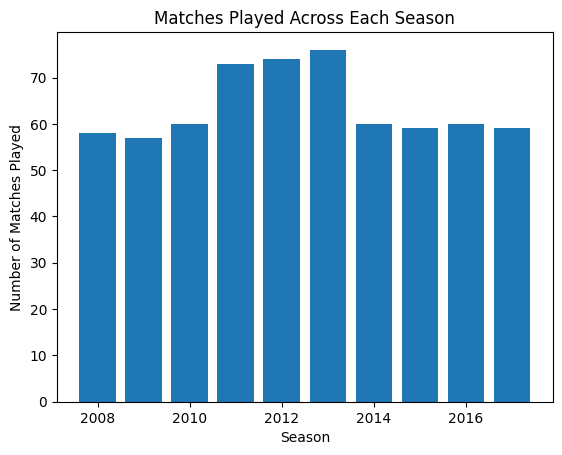

In [29]:
season_counts = df['season'].value_counts()
seasons = season_counts.index
matches_played = season_counts.values

plt.bar(seasons, matches_played)
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.title('Matches Played Across Each Season')
plt.show()

##### most lucky grounds for teams

In [38]:
def lucky(df, team_name):
    return df[df['winner'] == team_name]['venue'].value_counts().nlargest(5)

teams = df['winner'].unique()

fig = go.Figure()

for team in teams:
    top_venues = lucky(df, team)
    fig.add_trace(go.Bar(x=top_venues.index, y=top_venues.values, name=team))

fig.update_layout(title='Top 5 Winning Venues for Each IPL Team', xaxis_title='Venue', yaxis_title='Number of Wins')

fig.show(renderer="colab")


##### comparison between 2 teams on the basis of their wins

In [39]:
def comparison(team1,team2):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=compare)

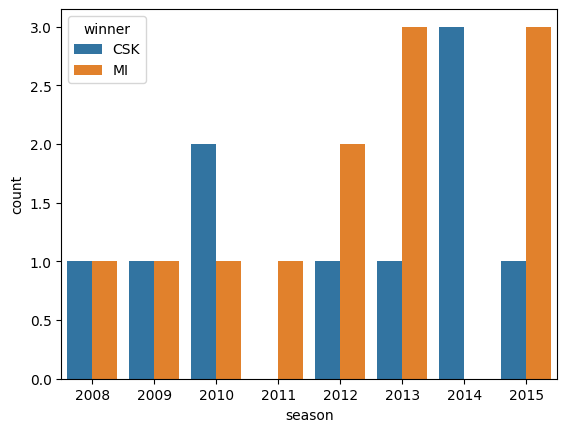

In [40]:
comparison('MI','CSK')

#### Here we can see that MI and CSK have played against each other in more than 2 matches, and MI dominates

Match win percentage by team: Create a bar plot showing the win percentage of each team over the years. This could help identify which teams are consistently performing well and which are struggling.

In [66]:
# Calculate number of matches won by each team in each season
team_season_wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')
team_season_wins.rename(columns={'winner': 'team'}, inplace=True)

# Calculate number of matches played by each team in each season
team_season_matches1 = df.groupby(['season', 'team1']).size().reset_index(name='matches')
team_season_matches1.rename(columns={'team1': 'team'}, inplace=True)

team_season_matches2 = df.groupby(['season', 'team2']).size().reset_index(name='matches')
team_season_matches2.rename(columns={'team2': 'team'}, inplace=True)

team_season_matches = pd.concat([team_season_matches1, team_season_matches2]).groupby(['season', 'team']).sum().reset_index()

# Merge the two dataframes to get the number of wins and matches for each team in each season
team_season_stats = pd.merge(team_season_matches, team_season_wins, on=['season', 'team'], how='left')

# Calculate win percentage
team_season_stats['win_perc'] = team_season_stats['wins'] / team_season_stats['matches'] * 100

# Plot win percentage by team

fig = px.bar(team_season_stats, x='team', y='win_perc', color='season', title='Win Percentage by Team')
fig.update_layout(height=800)
fig.show()


Toss decision and match outcome: Create a stacked bar plot showing the frequency of teams winning matches based on the toss decision (batting or bowling first). This could help identify whether teams are winning more matches by batting or bowling first.

In [69]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [71]:
# Create a new column for match outcome based on the result
df['outcome'] = np.where(df['winner'] == df['team1'], 'team1_won', 'team2_won')

# Create a pivot table to get the frequency of teams winning matches based on the toss decision
toss_decision_outcome = df.pivot_table(index='toss_winner', columns='toss_decision', values='outcome', aggfunc='count', fill_value=0)

# Create a stacked bar plot
fig = px.bar(toss_decision_outcome, x=toss_decision_outcome.index, y=[toss_decision_outcome['bat'], toss_decision_outcome['field']], title='Match Outcome based on Toss Decision', barmode='stack')
fig.update_layout(
    yaxis_title="Frequency"
)
fig.show()


Seasonal performance analysis: Create a line chart showing the win percentage of each team over each season. This could help identify the trend of a team's performance over the years and whether they are improving or declining.

In [72]:

# Calculate number of matches won by each team in each season
team_season_wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')
team_season_wins.rename(columns={'winner': 'team'}, inplace=True)

# Calculate number of matches played by each team in each season
team_season_matches1 = df.groupby(['season', 'team1']).size().reset_index(name='matches')
team_season_matches1.rename(columns={'team1': 'team'}, inplace=True)

team_season_matches2 = df.groupby(['season', 'team2']).size().reset_index(name='matches')
team_season_matches2.rename(columns={'team2': 'team'}, inplace=True)

team_season_matches = pd.concat([team_season_matches1, team_season_matches2]).groupby(['season', 'team']).sum().reset_index()

# Merge the two dataframes to get the number of wins and matches for each team in each season
team_season_stats = pd.merge(team_season_matches, team_season_wins, on=['season', 'team'], how='left')

# Calculate win percentage
team_season_stats['win_perc'] = team_season_stats['wins'] / team_season_stats['matches'] * 100

# Create line chart showing win percentage of each team over each season
fig = px.line(team_season_stats, x='season', y='win_perc', color='team', title='Win Percentage of Each Team Over Each Season')
fig.show()
